Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
countries = pd.read_csv('countries.csv')
countries.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [23]:
income = pd.read_excel('income.xlsx', index_col = 0)
income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
GDP per capita,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,1173.0,1298.0,1311.0,1548.0,1637.0,1695.0,1893.0,1884.0,1877.0,1925.0
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,667.0,667.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,668.0,...,7476.0,7977.0,8644.0,8994.0,9374.0,9640.0,9811.0,9961.0,10160.0,10620.0
Algeria,716.0,716.0,717.0,718.0,719.0,720.0,721.0,722.0,723.0,724.0,...,12088.0,12289.0,12314.0,12285.0,12494.0,12606.0,12779.0,12893.0,13179.0,13434.0


In [24]:
income_t = income.T
income_t.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [25]:
# income_t.rename(column = {"GDP per capita" : "year"})
# income_t.head()

income_t.columns.tolist()
income_t.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


In [39]:
income_2000 = income_t.loc[2000]
print(income_2000)

GDP per capita
Abkhazia                         NaN
Afghanistan                    962.0
Akrotiri and Dhekelia            NaN
Albania                       5305.0
Algeria                       9885.0
American Samoa                   NaN
Andorra                      31662.0
Angola                        3387.0
Anguilla                         NaN
Antigua and Barbuda          19319.0
Argentina                    11504.0
Armenia                       2919.0
Aruba                        43703.0
Australia                    35253.0
Austria                      38548.0
Azerbaijan                    4459.0
Bahamas                      25858.0
Bahrain                      45063.0
Bangladesh                    1632.0
Barbados                     14677.0
Belarus                       7300.0
Belgium                      37404.0
Belize                        7215.0
Benin                         1525.0
Bermuda                      51140.0
Bhutan                        3596.0
Bolivia                

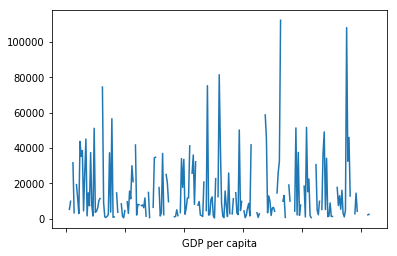

In [42]:
income_2000.plot()